In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel, binned_statistic_2d, chisquare, norm
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt


In [4]:
%%markdown
# gmat


# gmat


In [5]:
# Every year more than 200000 people aroung the world take GMAT exam to enter MBA programs. 
# The average score is 525 points, standard deviation – 100 points. 
# A hundred students of a GMAT passed the exam; theis average score is 541.4 points.

# Test the hypothesis of inefficiency of the program against one-sided alternative that it helps students. Do you reject the null at 0.05?

# Enter the p-value you got rounded to 4 decimal points.

z = (541.4 - 525) / (100 / 10)
p = 1 - norm.cdf(z)

np.round(p, 4)

0.0505

In [6]:
# Now evaluate the efficiency of another GMAT preparation study group with the average score of 100 students of 541.5 points, use the same alternative. 
# Do you reject the null at 0.05?
# Enter the p-value you got rounded to 4 decimal points.

z = (541.5 - 525) / (100 / 10)
p = 1 - norm.cdf(z)

np.round(p, 4)

0.0495

In [7]:
%%markdown
# aspirin


# aspirin


In [8]:
# In a 5 year randomized trial by Harvard Medical School researchers, 11037 subjects were taking aspirin every other day, 
# and 11034 subjects were taking placebo. In the treatment group, 104 subjects had heart attacks during those 5 years; 
# in the control group – 189 subjects.

# Estimate how much the probability of a heart attack decreases for the aspirin group. Provide the answer with 4 decimal points.

np.round((189 / 11034) - (104 / 11037),4)

0.0077

In [23]:
# Calculate a 95% Wald's confidence interval for the decrease in probability of a heart attack associated with taking aspirin. 
# What is its upper bound? Round the answer to 4 decimal points.

print(f"Wald's interval: {np.round(sms.confint_proportions_2indep(189, 11034, 104, 11037, method = 'wald', compare='diff')[1], 4)}")

Wald's interval: 0.0107


In [27]:
# Test the hypothesis of equal proportions against two-sided alternative with Z-test based on Wilson's interval. What p-value do you get? 
# Enter the number of the first significant digit in the p-value

sms.test_proportions_2indep(189, 11034, 104, 11037, alternative = 'two-sided', method = 'score', return_results=False) # --> answer 7

(5.00127490046852, 5.69524362691927e-07)

In [28]:
# Estimate how many times lower are the odds of a heart attack for people who regularly take aspirin. 
# Provide the answer rounded to 4 decimal points.

np.round((189 / (11034 - 189)) / (104 / (11037 - 104)), 4)

1.8321

In [31]:
# The variable you estimated in the previous question is called odds ratio. Calculate 95% confidence interval for it with bootstrap. 
# What is its lower bound? Provide the answer with 4 decimal points.

# To get exactly the same results as we did:
# use get_bootstrap_samples and percentile_interval functions from the example notebook
# set random seed = 0 before calling get_bootstrap_samples, once
# use 1000 bootstrap resamples from each sample


np.random.seed(0)

def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def percentile_interval(data, alpha):
    boundaries = np.percentile(data, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

def odds(data):
    p = float(sum(data)) / len(data)
    return p / (1-p)

placebo = np.concatenate([np.ones(189), np.zeros(11034-189)])
aspirin = np.concatenate([np.ones(104), np.zeros(11037-104)])

placebo_odds = list(map(odds, get_bootstrap_samples(placebo, 1000)))
aspirin_odds = list(map(odds, get_bootstrap_samples(aspirin, 1000)))

ORs = np.array(placebo_odds) / np.array(aspirin_odds)
percentile_interval(ORs, 0.05)

array([1.46286276, 2.35093673])

In [32]:
%%markdown
# aspirin

# aspirin


In [33]:
# For healthy young women average level of calcium in blood is 9.5 mg per deciliter with the typical standard deviation of 0.4 mg/dl.
# In a rural hospital in Guatemala for 160 healthy women on early stages of pregnancy blood calcium level was measured; 
# the average was 9.57 mg/dl. Does the average level differ from 9.5?

# Calculate the p-value, round it up to 4 decimal places.

z = (9.57 - 9.5) / (0.4 / np.sqrt(160))
p = 2 * (1 - norm.cdf(z))

np.round(p, 4)

0.0269

In [4]:
%%markdown
# diamond prices

# diamond prices


In [5]:
diam = pd.read_csv('../datasets/diamond_prices.csv')
diam

,price,predicted_price_lm,predicted_price_gbdt
0,564,747.149466,799.049243
1,5914,6644.569397,6635.491541
2,2562,2096.573114,2138.584133
3,537,727.031366,694.107710
4,5964,7180.988674,7425.353560
...,...,...,...
13480,2239,2403.202635,2354.263323
13481,1092,908.723195,896.414922
13482,3285,4534.975464,4638.855560
13483,3734,3465.940124,3381.763771


In [6]:
# Which of the two models is better? Calculate the difference in mean absolute errors of two models, round the result to 2 decimal points.

np.round(abs(diam['price'] - diam['predicted_price_lm']).mean() - abs(diam['price'] - diam['predicted_price_gbdt']).mean(), 2)

6.88

In [7]:
# Is the difference in predictive performance of two models significant? 
# Test the hypothesis with appropriate test, provide the p-value rounded to 4 decimal points.

np.round(ttest_rel(abs(diam['price'] - diam['predicted_price_lm']), abs(diam['price'] - diam['predicted_price_gbdt'])).pvalue, 4)

0.0172

In [8]:
# Build a 95% confidence interval for the difference in absolute prediction errors. What is its bound closest to zero? Provide the answer rounded to 2 decimal points.

np.round(sms.DescrStatsW(
    abs(diam['price'] - diam['predicted_price_lm']) - \
    abs(diam['price'] - diam['predicted_price_gbdt']))\
        .tconfint_mean(), 2)

array([ 1.22, 12.53])

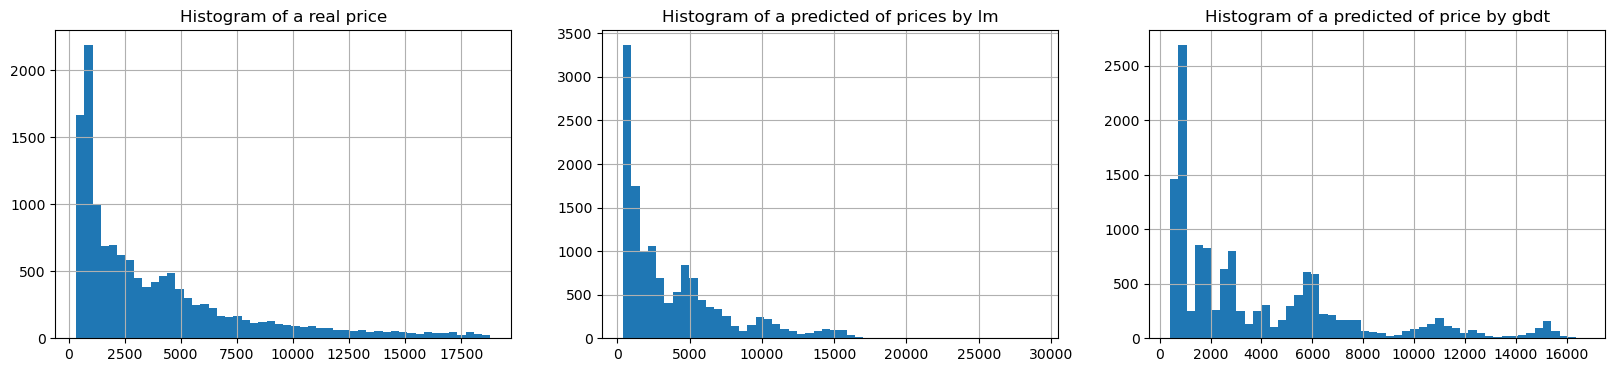

In [11]:
fig, ax = plt.subplots(ncols=3, figsize=(20, 4))
ax[0].hist(diam.price, bins=50);
ax[0].set_title('Histogram of a real price')
ax[0].grid()
ax[1].hist(diam.predicted_price_lm, bins=50);
ax[1].set_title('Histogram of a predicted of prices by lm')
ax[1].grid()
ax[2].hist(diam.predicted_price_gbdt, bins=50);
ax[2].set_title('Histogram of a predicted of price by gbdt')
ax[2].grid()

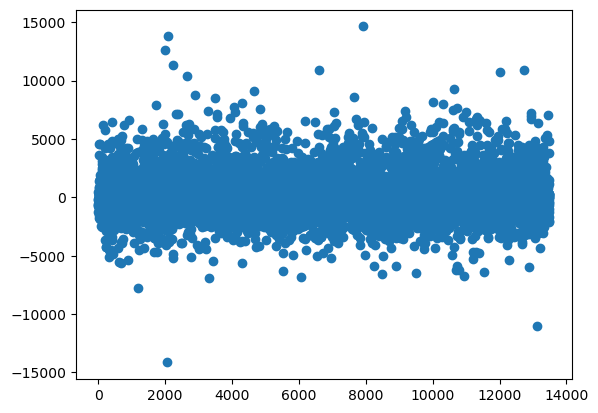

In [12]:
true_value = diam.price
predicted_value = diam.predicted_price_lm


g=plt.plot(true_value - predicted_value,marker='o',linestyle='')


In [2]:
%%markdown
# pines

# pines


In [39]:
pines = pd.read_csv("../datasets/pines.txt", sep='\t')

# split the plot on 5х5 identical squares 40x40 m each, 
# calculate the number of pines in each square (to get the same results as we did, use scipy.stats.binned_statistic_2d).

# If the distribution of pines is uniform, what is the expected average number of pines in each square? Enter the answer with two decimal points.

trees_bins = binned_statistic_2d(pines.sn, pines.we, values=None, statistic='count', bins=[5, 5])
trees_squares_num = trees_bins.statistic

mean_trees_num = np.sum(trees_squares_num) / 25
print(mean_trees_num)

23.36


In [40]:
# To compare the distribution of pines with uniform, calculate the value of chi-squared test statistic for that set of 40x40m plots. 
# Enter it with two decimal points.

np.round(chisquare(trees_squares_num.flatten(), ddof = 0).statistic, 2)

150.59

In [45]:
# Is this value large enough to reject the hypothesis of uniform distribution? Calculate the p-value. Do you reject the hypothesis at 0.05?

chisquare(trees_squares_num.flatten(), ddof = 0).pvalue # -> rejected

2.574669774967279e-20

In [46]:
%%markdown
# lactose tolerance

# lactose tolerance


In [53]:
# lactose
# Most adult mammals are unable to digest lactose contained in milk. 
# In humans, an enzyme called lactase can break down lactose and complete milk digestion. 
# It is encoded by a gene LCT. If that gene has a variant 13910T, the carriers are able to digest milk in adulthood. 
# The distribution of this genetic variant is very different across subpopulations of humans. 
# Out of 50 tested Maya peoples, 13910T was found in one. 
# Build a 95% Wald's confidence interval for the proportion of 13910T carriers in Maya population. 
# What is its' upper bound? Round the answer to 3 decimal points.

print(f"Wald's interval: {np.round(sms.proportion_confint(1, 50, method = 'normal')[1], 3)}")

Wald's interval: 0.059


In [54]:
# Build a 95% Wilson's confidence interval for the proportion of 13910T carriers in Maya population. What is its' upper bound? Round the answer to 3 decimals.

print(f"Wilson's interval: {np.round(sms.proportion_confint(1, 50, method = 'wilson')[1], 3)}")

Wilson's interval: 0.105


In [161]:
# Assuming Maya peoples have 2% of 13910T carriers, just like the sample that we had, 
# how many subjects we need to test to estimate that proportion with precision ±0.01 on 95% confidence level?

np.ceil(sms.samplesize_confint_proportion(1.0/50, 0.01, method='normal'))

753.0

In [55]:
# Plot the sample size necessary to estimate the proportion of 13910T carriers with precision ±0.01 on 95% confidence level as a function of the unknown parameter 𝑝.
# With which 𝑝 do we need the most subjects? How likely, in your opinion, that p is equal to that, given the sample that we have seen?

# How many people do we have to test in the worst case to estimate the proportion of 13910T carriers with precision ±0.01on 95% confidence level?

np.ceil(sms.samplesize_confint_proportion(0.5, 0.01, method='normal'))

9604.0